https://docs.microsoft.com/es-es/sql/connect/python/pyodbc/step-1-configure-development-environment-for-pyodbc-python-development?view=sql-server-ver15

In [13]:
import pyodbc


In [14]:
server = 'tcp:solidqdemo.database.windows.net' 
database = 'AdventureWorksLT' 
username = 'adminsql' 
password = 'Puk02020#!' 
cnxn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)



In [4]:
#Consulta de ejemplo
cursor = cnxn.cursor()
cursor.execute("SELECT @@version;") 
row = cursor.fetchone() 
while row: 
    print(row[0])
    row = cursor.fetchone()

Microsoft SQL Azure (RTM) - 12.0.2000.8 
	Oct 12 2019 22:46:48 
	Copyright (C) 2019 Microsoft Corporation



In [6]:
cursor.execute("SELECT * FROM SALESLT.Product")
row = cursor.fetchone() 
while row: 
    print(row[1])
    row = cursor.fetchone()

In [9]:
cursor.close()

In [10]:
cnxn.close()

# Cargando en un Dataframe Pandas el resultado de una select

In [1]:
import pyodbc

In [7]:
server = 'tcp:solidqdemo.database.windows.net' 
database = 'AdventureWorksLT' 
username = 'adminsql' 
password = 'Puk02020#!' 
cnxn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)

In [3]:
import pandas as pd 

In [4]:
salesorderheader = "SELECT * FROM SALESLT.SALESORDERHEADER"
df_salesorderheader = pd.read_sql(salesorderheader, cnxn)

salesorderdetail = "SELECT * FROM SALESLT.SALESORDERDETAIL"
df_salesorderdetail = pd.read_sql(salesorderdetail , cnxn)

df_sales = pd.merge(df_salesorderheader , df_salesorderdetail, on ='SalesOrderID')

df_sales.head(5)

In [5]:
product = "select p.*,pc.ParentProductCategoryID,pc.Name as ProductCategoryName , pm.Name as ProductModelName \
from saleslt.product p inner join saleslt.ProductCategory pc  \
    on p.ProductCategoryID = pc.ProductCategoryID \
    inner join saleslt.ProductModel pm  \
    on p.ProductModelID = pm.ProductModelID"
df_product = pd.read_sql(product , cnxn)

df_product.head(3)

In [ ]:
customer = "select c.*, ca.AddressType , a.City ,a .PostalCode, a.StateProvince, a.CountryRegion \
from saleslt.Customer c inner join saleslt.CustomerAddress ca \
on c.CustomerID = ca.CustomerID  \
inner join saleslt.Address a \
on ca.AddressID = a.AddressID"

df_customer = pd.read_sql(customer)

# Cargar datos de ventas

In [2]:
import pyodbc
import pandas as pd 
import matplotlib.pyplot as plt 

In [3]:
server = 'tcp:solidqdemo.database.windows.net' 
database = 'AdventureWorksLT' 
username = 'adminsql' 
password = 'Puk02020#!' 
ventas = "SELECT * FROM saleslt.vwVentas"

#Abimos la conexion
cnxn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)

In [4]:
df_ventas = pd.read_sql(ventas,cnxn)

df_ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542 entries, 0 to 541
Data columns (total 18 columns):
OrderQty             542 non-null int64
UnitPrice            542 non-null float64
UnitPriceDiscount    542 non-null float64
LineTotal            542 non-null float64
SalesOrderID         542 non-null int64
SalesOrderNumber     542 non-null object
OrderDate            542 non-null datetime64[ns]
ShipMethod           542 non-null object
Freight              542 non-null float64
ProductName          542 non-null object
color                478 non-null object
Size                 393 non-null object
CompanyName          542 non-null object
SalesPerson          542 non-null object
City                 542 non-null object
PostalCode           542 non-null object
StateProvince        542 non-null object
CountryRegion        542 non-null object
dtypes: datetime64[ns](1), float64(4), int64(2), object(11)
memory usage: 76.3+ KB


In [9]:
df_ventas.isnull()

,OrderQty,UnitPrice,UnitPriceDiscount,LineTotal,SalesOrderID,SalesOrderNumber,OrderDate,ShipMethod,Freight,ProductName,color,Size,CompanyName,SalesPerson,City,PostalCode,StateProvince,CountryRegion
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
538,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
539,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
540,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


El signo del índice de correlación también nos da información.  Si el índice de correlación entre dos variables es positivo, significa que, si una de ellas aumenta, la otra también lo hace. Por el contrario,  cuando el signo es negativo, si una variable aumenta, la otra, disminuye.

In [10]:
df_ventas.corr()

,OrderQty,UnitPrice,UnitPriceDiscount,LineTotal,SalesOrderID,Freight
OrderQty,1.000000,-0.100957,0.006118,0.302565,-0.138392,0.345376
UnitPrice,-0.100957,1.000000,-0.116786,0.720194,-0.010939,0.005229
UnitPriceDiscount,0.006118,-0.116786,1.000000,-0.072666,0.033308,-0.007659
LineTotal,0.302565,0.720194,-0.072666,1.000000,0.003595,0.197033
SalesOrderID,-0.138392,-0.010939,0.033308,0.003595,1.000000,0.043764
Freight,0.345376,0.005229,-0.007659,0.197033,0.043764,1.000000


In [5]:
#Ventas por Empresa cliente
df_ventas.groupby('CompanyName')['LineTotal'].sum()

CompanyName
Action Bicycle Specialists         89869.276314
Aerobic Exercise Company            1732.890000
Bulk Discount Store                74160.228000
Central Bicycle Specialists           31.584000
Channel Outlet                       524.664000
Closest Bicycle Store              28950.678108
Coalition Bike Company              1856.206800
Discount Tours                      2527.128000
Eastside Department Store          65683.367986
Engineered Bike Systems             2847.408000
Essential Bike Works                  37.758000
Extreme Riding Supplies            47848.026000
Futuristic Bikes                     221.256000
Good Toys                            713.796000
Instruments and Parts Company      53248.692000
Many Bikes Store                   59894.209200
Metropolitan Bicycle Supply        79589.616024
Nearby Cycle Shop                  29923.008000
Paints and Solvents Company        10585.050000
Professional Sales and Service     33319.986000
Remarkable Bike Store       

In [ ]:
df_ventas['OrderQty'].plot(kind='box',figsize=(12,8))

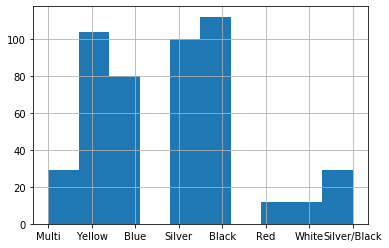

In [12]:
df_ventas.color.hist()

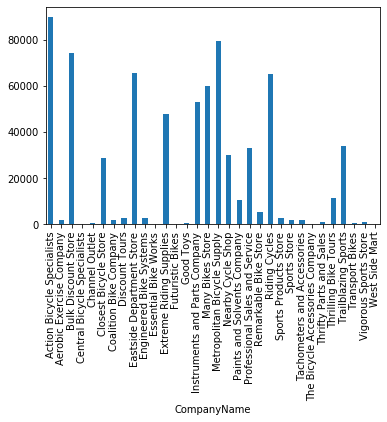

In [7]:
df_ventas.groupby('CompanyName')['LineTotal'].sum().plot (kind='bar')

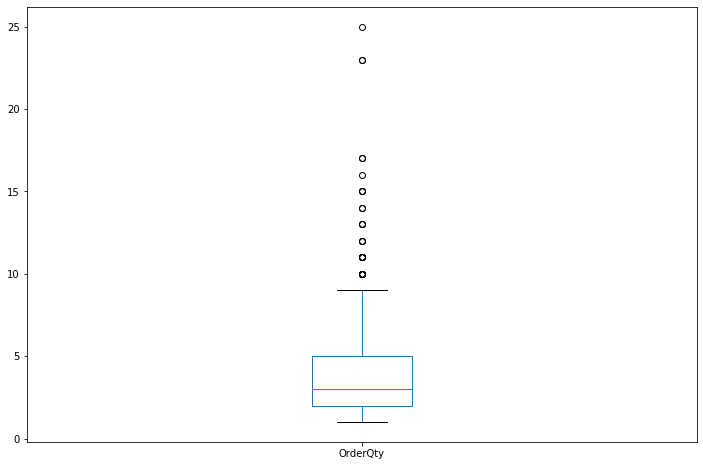